In [3]:
import pandas as pd
import numpy as np

In [4]:
path = "C:\\Users\\User\\Desktop\\Internship\\gapminder-FiveYearData.csv"
table = pd.read_csv(path)

In [5]:
print(table)

          country  year         pop continent  lifeExp   gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106
...           ...   ...         ...       ...      ...         ...
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298

[1704 rows x 6 columns]


# Consider the task of finding out the average life expectancy of people across all the continents. Python provides us an inbuilt function to do so with absolutely no extra work at all.

In [6]:
x = table['lifeExp']
np.mean(x)

59.47443936619713

# In a similar fashion the median of the data can also be found out.

In [7]:
np.median(x)

60.7125

# To find out the mode of the same we need to follow the below given precedure.

In [8]:
import scipy
from scipy import stats
print(stats.mode(x))

ModeResult(mode=array([69.39]), count=array([4]))


# So, here the mode of the life expectancy is 69.39 in the dataset used and it has a frequency of 4.

# Now, Let's find out the standard deviation for the same given dataset to learn how are the life expectancies varying from

In [9]:
import statistics as stats

In [10]:
print(stats.stdev(x))

12.917107415241192


# Mean Deviation or Mean Absolute Deviation is given below

In [11]:
series = pd.Series(x)
print(series.mad())

11.307998834804604


# The Range of the given dataset is

In [12]:
print(max(x)-min(x))

59.00399999999999


# Percentile values could be found out using python's inbuilt function as follows

In [13]:
np.percentile(x,50)            #the 50th percentile is nothing but the median of the selected data "lifeExp"

60.7125

In [14]:
np.percentile(x,30)            #the 30th percentile

50.602096

# Now let's divide the entire data within 'lifeExp' into four equal groups using QUARTILES

In [15]:
Q1 = np.percentile(x,25)
print(Q1)                                       # 1st quartile

48.198


In [16]:
Q2 = np.percentile(x,50)
print(Q2)                                       # 2nd quartile

60.7125


In [17]:
Q3 = np.percentile(x,75)
print(Q3)                                       # 3rd quartile

70.8455


# Interquartile Range

In [18]:
IQR = Q3 - Q1
print(IQR)

22.6475


# Looking at the Skewness of lifeExp data

In [19]:
from scipy.stats import skew

In [20]:
skew(x)

-0.2524797544051677

# Kurtosis

In [21]:
from scipy.stats import kurtosis
kurtosis(x)

-1.1269006490300588

# Correlation 

In [22]:
import pingouin as pg

## The correlation between the LifeExp and year is 

In [23]:
pg.corr(x = table['lifeExp'] , y = table['year'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1704,0.436,"[0.4, 0.47]",0.19,0.189,7.546795e-80,1.444e+76,1.0


In [24]:
# 1. n is the sample size, i.e. how many observations were included in the calculation of the correlation coefficient
# 2. r is the correlation coefficient, 0.45 in that case, which is quite high.
# 3. CI95% are the 95% confidence intervals around the correlation coefficient
# 4. r2 and adj_r2 are the r-squared and ajusted r-squared respectively. As its name implies, it is simply the squared r, which is a measure of the proportion of the variance in the first variable that is predictable from the second variable.
# 5. p-val is the p-value of the test. The general rule is that you can reject the hypothesis that the two variables are not correlated if the p-value is below 0.05, which is the case. We can therefore say that there is a significant correlation between the two variables.
# 6. BF10 is the Bayes Factor of the test, which also measure the statistical significance of the test. It directly measures the strength of evidence in favor of our initial hypothesis that weight and height are correlated. Since this value is very large, it indicates that there is very strong evidence that the two variables are indeed correlated. While they are conceptually different, the Bayes Factor and p-values will in practice often reach the same conclusion.
# 7. power is the achieved power of the test, which is the likelihood that we will detect an effect when there is indeed an effect there to be detected. The higher this value is, the more robust our test is. In that case, a value of 1 means that we can be greatly confident in our ability to detect the significant effect.

# The Correlation Matrix

In [25]:
table.corr().round(2)

,year,pop,lifeExp,gdpPercap
year,1.00,0.08,0.44,0.23
pop,0.08,1.00,0.06,-0.03
lifeExp,0.44,0.06,1.00,0.58
gdpPercap,0.23,-0.03,0.58,1.00


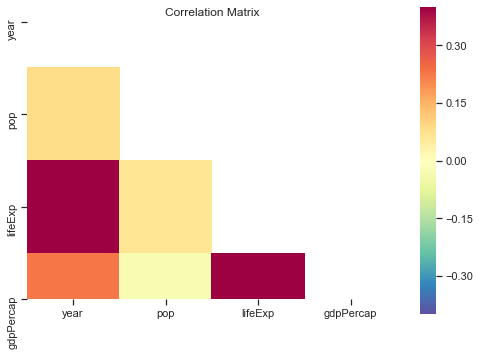

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5))
corrs = table.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation Matrix')
plt.tight_layout()

#### Warm colors (red) indicate a positive correlation, cool colors (blue) indicate a negative correlation.

## Is Life Expectancy correlated to the year?

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  if __name__ == '__main__':


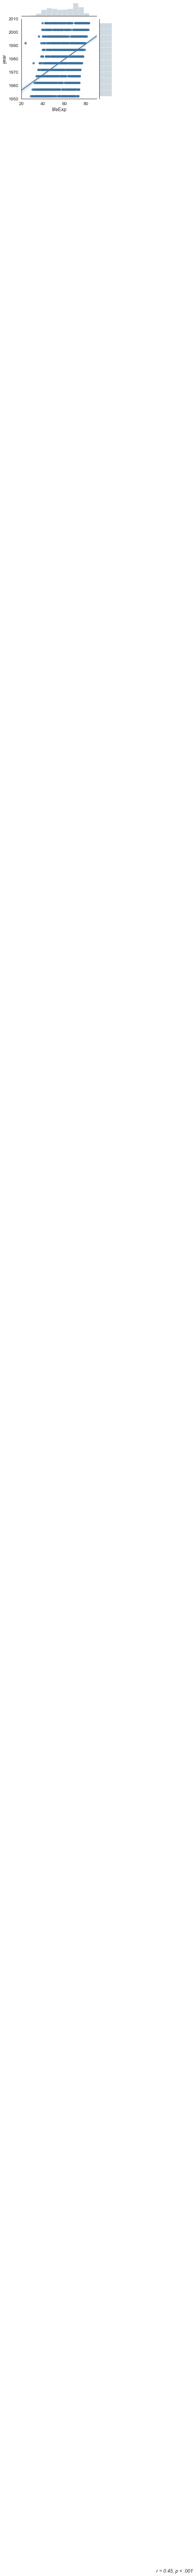

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)
g = sns.JointGrid(data=table, x='lifeExp', y='year', xlim=(20, 90), ylim=(1950, 2010), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

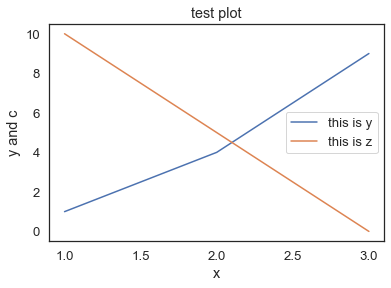

In [28]:
a=[1,2,3]
b=[1,4,9]
c=[10,5,0]
plt.plot(a,b)
plt.plot(a,c)
plt.title('test plot')
plt.xlabel("x")
plt.ylabel("y and c")
plt.legend(['this is y', 'this is z'])
plt.show()

In [29]:
type(table)

pandas.core.frame.DataFrame

In [30]:
table.year

0       1952
1       1957
2       1962
3       1967
4       1972
        ... 
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64

In [31]:
type(table.lifeExp)

pandas.core.series.Series

In [32]:
table.year.iloc[2]

1962

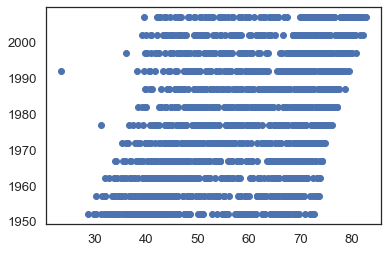

In [33]:
plt.plot(table.lifeExp, table.year, 'o')
plt.show()

# Class Distribution

In [34]:
p = np.random.randint(low=0, high=100, size=100)
frequency, bins = np.histogram(p, bins=10, range=[0, 100])
for b, f in zip(bins[1:], frequency):
    print(round(b, 1), ' '.join(np.repeat('*', f)))

10.0 * * * * * * *
20.0 * *
30.0 * * * * * * * * * * * *
40.0 * * * * * * *
50.0 * * * * * * * * * * * *
60.0 * * * * * * * * * * * * * * *
70.0 * * * * * * * * * * *
80.0 * * * * * * * * * * *
90.0 * * * * * * * * *
100.0 * * * * * * * * * * * * * *


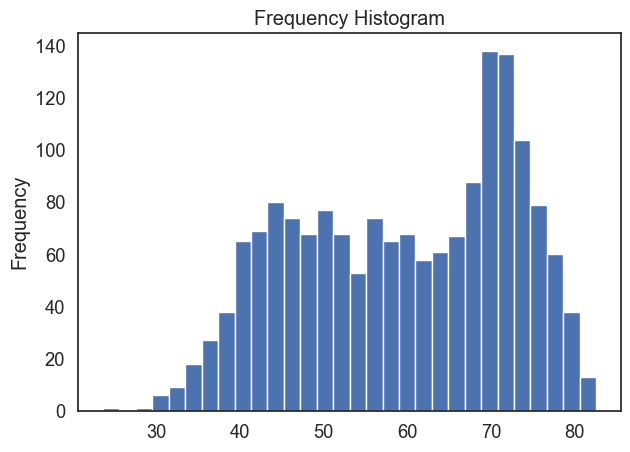

In [35]:
%matplotlib inline
# y=table['year']
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(x, bins=30)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


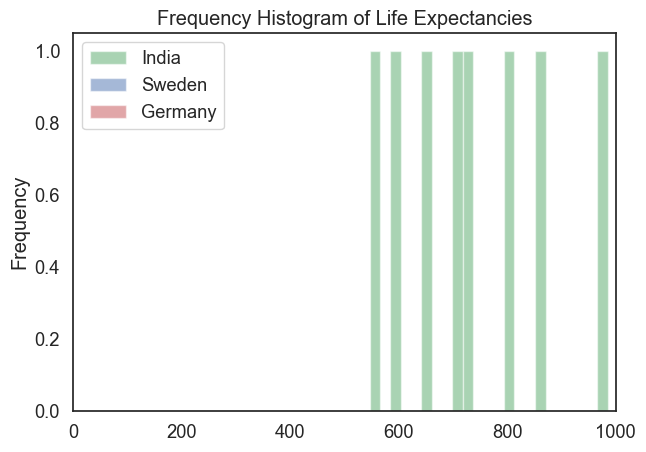

In [37]:
x1 = table.loc[table.country=='India', 'gdpPercap']
x2 = table.loc[table.country=='Sweden', 'gdpPercap']
x3 = table.loc[table.country=='Germany', 'gdpPercap']

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='India')
plt.hist(x2, **kwargs, color='b', label='Sweden')
plt.hist(x3, **kwargs, color='r', label='Germany')
plt.gca().set(title='Frequency Histogram of Life Expectancies', ylabel='Frequency')
plt.xlim(0,1000)
plt.legend();

In [38]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


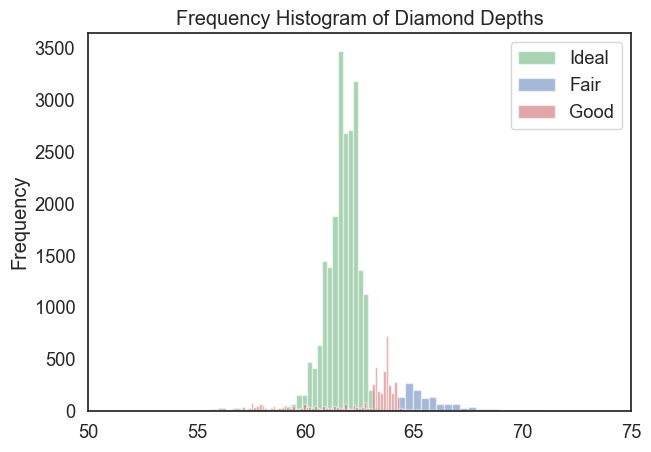

In [39]:
x1 = df.loc[df.cut=='Ideal', 'depth']
x2 = df.loc[df.cut=='Fair', 'depth']
x3 = df.loc[df.cut=='Good', 'depth']

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='Ideal')
plt.hist(x2, **kwargs, color='b', label='Fair')
plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.xlim(50,75)
plt.legend();

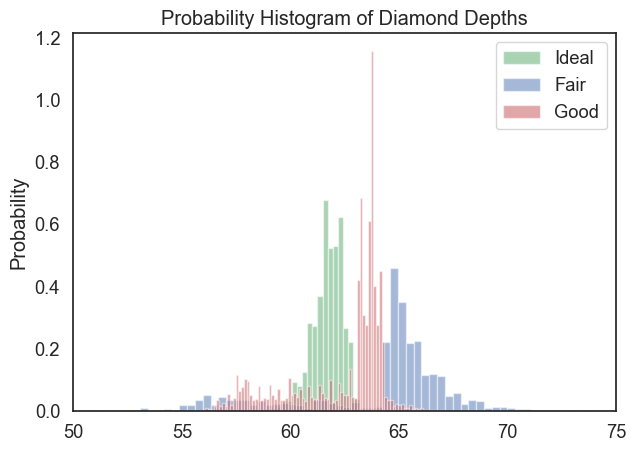

In [40]:
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

plt.hist(x1, **kwargs, color='g', label='Ideal')
plt.hist(x2, **kwargs, color='b', label='Fair')
plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Probability Histogram of Diamond Depths', ylabel='Probability')
plt.xlim(50,75)
plt.legend();

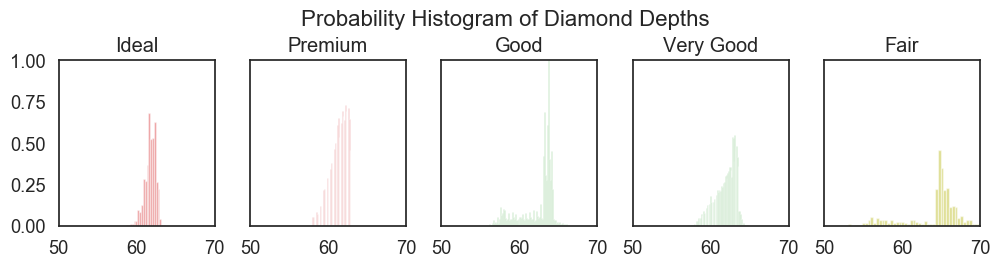

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:red', 'tab:green', 'tab:green', 'tab:olive']

for i, (ax, cut) in enumerate(zip(axes.flatten(), df.cut.unique())):
    x = df.loc[df.cut==cut, 'depth']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(cut), color=colors[i])
    ax.set_title(cut)

plt.suptitle('Probability Histogram of Diamond Depths', y=1.05, size=16)
ax.set_xlim(50, 70); ax.set_ylim(0, 1);
plt.tight_layout();